In [1]:
import PIL
from PIL import Image
import os
import numpy as np

#from tensorflow.keras.utils import np_utils
import tensorflow as tf
import tensorflow_addons as tfa

import matplotlib.pyplot as plt

In [16]:
image = Image.open('../data/gtsrb_full/train_images/00000/00000_00000.png')
image = np.asarray(image, dtype="float32")/255.0

In [21]:
# Brightness
def process_image_brightness(image):
    image = tf.clip_by_value(tf.image.random_brightness(image, max_delta = 0.25), 0, 1)
    return image


# Contrast
def process_image_contrast(image):
    image = tf.clip_by_value(tf.image.random_contrast(image, lower=0.7, upper=1.3, seed=None), 0, 1)
    return image

# Saturation
def process_image_saturation(image):
    image = tf.image.random_saturation(image, lower=0.6, upper= 1.4, seed=None)
    return image


# Contrast
def process_image_translate(image):
    rx = tf.random.uniform(shape=(), minval=-10, maxval=10)
    ry = tf.random.uniform(shape=(), minval=-4, maxval=4) - 4
    image = tfa.image.translate(image, [rx, ry])
    return image

# Saturation
def process_image_rotate(image):
    r = tf.random.uniform(shape=(), minval=0, maxval=0.5) - 0.25
    image = tfa.image.rotate(image, r)
    #image = tf.clip_by_value(tfa.image.random_hsv_in_yiq(image, 0.0, 0.4, 1.1, 0.4, 1.1), 0.0, 1.0)
    #image = tf.clip_by_value(tf.image.adjust_brightness(image, tf.random.uniform(shape=(), minval=0, maxval=0.1)-0.2),0,1)
    return image

def apply_all(image):
    image = process_image_brightness(image)
    image = process_image_contrast(image)
    image = process_image_saturation(image)
    image = process_image_translate(image)
    image = process_image_rotate(image)
    return image

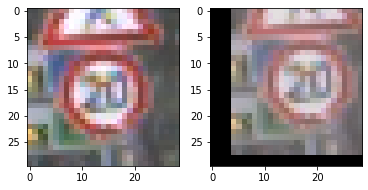

In [27]:
img = apply_all(image)

_, ax = plt.subplots(1,2, figsize=(6,3))
ax[0].imshow(image)
ax[1].imshow(img)
plt.show()